[![image.png](https://i.postimg.cc/Df6QS0kf/image.png)](https://postimg.cc/s1BG8Vgb)

<div style="padding:20px 30px 30px; 
            color:#004346;
            font-size:40px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 
<p style="font-weight: bold; text-align: center;">Оценка риска ДТП</p>


</div>

<div style="padding:0px 40px 30px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
__Заказчик:__ каршеринговая компания.
    
__Постановка задачи:__ разработать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения.
    
__Описание задачи:__ Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту. 

__Оценка результата:__ 
    
__Описание данных:__ Исторические данные о ДТП одного из регионов представленные в воде базы данных.
    



</div>    

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Используемые библиотеки

</div>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import phik
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine

# константы
RANDOM_SEED = 42

## Подключение к базе данных

In [34]:
# конфигурация для подключения к базе данных
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

# создание подключения к базе данных
connection = psycopg2.connect(
    user=db_config['user'],
    password=db_config['pwd'],
    host=db_config['host'],
    port=db_config['port'],
    database=db_config['db']
)

# создаем курсора для выполнения запросов
cursor = connection.cursor()

#### функция для выполнения запросов

In [35]:
# функция для выполнения запросов
def request(query):
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        result_df = pd.DataFrame(result, columns=[desc[0] for desc in cursor.description])
        return result_df
    except Exception as e:
        print(f'Error: {e}')
        connection.rollback()  # Откатываем транзакцию, чтобы избежать блокировки

In [36]:
# тестовый запрос
query = '''
SELECT case_id, county_city_location, county_location, distance, direction
FROM collisions
LIMIT 1;
'''
display(request(query))

,case_id,county_city_location,county_location,distance,direction
0,4083072,1942,los angeles,528.0,north


<div style="padding: 30px 25px; border: 2px #6495ed solid">

- Подключение к базе данных успешно установлено.
- Функция для выполнения запросов работает корректно.
    
</div>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Первичное исследование таблиц базы данных

</div>

- Проверим все ли таблицы имеют набор данных;
- Посмотрим количество таблиц;
- Имеется ли общий ключ для связи таблиц.

In [37]:
# создание engine для подключения к базе данных
engine = sqlalchemy.create_engine(
    f"postgresql://{db_config['user']}:{db_config['pwd']}@{db_config['host']}:{db_config['port']}/{db_config['db']}"
)
# получение метаданных таблицы
metadata = sqlalchemy.MetaData()
metadata.reflect(bind=engine)

__Общая информация о таблицах__

In [38]:
for table_name, table in metadata.tables.items():
    query = f'SELECT COUNT(*) FROM {table_name};'
    print(f'''
Таблица: {table_name};
Количество записей: {request(query).iloc[0][0]};
Признаки: {table.columns.keys()};
Первичный ключ: {table.primary_key.columns.keys() if table.primary_key else 'Отсутствует'}     
           ''')


Таблица: case_ids;
Количество записей: 1400000;
Признаки: ['case_id', 'db_year'];
Первичный ключ: Отсутствует     
           

Таблица: collisions;
Количество записей: 1400000;
Признаки: ['case_id', 'county_city_location', 'county_location', 'distance', 'direction', 'intersection', 'weather_1', 'location_type', 'collision_damage', 'party_count', 'primary_collision_factor', 'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'collision_date', 'collision_time'];
Первичный ключ: Отсутствует     
           

Таблица: parties;
Количество записей: 2752408;
Признаки: ['id', 'case_id', 'party_number', 'party_type', 'at_fault', 'insurance_premium', 'party_sobriety', 'party_drug_physical', 'cellphone_in_use'];
Первичный ключ: Отсутствует     
           

Таблица: vehicles;
Количество записей: 1021234;
Признаки: ['id', 'case_id', 'party_number', 'vehicle_type', 'vehicle_transmission', 'vehicle_age'];
П

<div style="padding: 30px 25px; border: 2px #6495ed solid">

- В базе данных есть три основные таблицы, c наборами данных, но без явно указанных первичных ключей.

- Таблица __'collisions'__ — общая информация о ДТП:
    - Из описания данных известно, имеет уникальный `case_id`, который является уникальным идентификатором для каждого зарегистрированного происшествия;
    - Эта таблица содержит общую информацию о происшествии, включая место, дату и время его происхождения, погодные условия, серьезность происшествия и другие характеристики.
    
- Таблица __'parties'__ — информация об участниках ДТП:
    - Имеет неуникальный `case_id`, который связан с соответствующим ДТП в таблице 'collisions'.
    - Каждая строка в этой таблице описывает одну из сторон, участвующих в ДТП. Например, если в ДТП участвуют две машины, то в этой таблице будет две строки с совпадающим `case_id`.
    - Для создания уникального идентификатора участника можно использовать комбинацию `case_id` и `party_number`.

- Таблица __'vehicles'__ — информация о пострадавших машинах:
    - Имеет неуникальные `case_id` и неуникальные `party_number`, которые связаны с таблицами 'collisions' и 'parties'.
    - Данная таблица содержит информацию о пострадавших машинах, и каждая строка описывает одно транспортное средство.
    - Для создания уникального идентификатора машины можно использовать комбинацию `case_id` и `party_number`.


</div>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Анализ факторов ДТП

</div>

### Зависимость количество аварий от месяца

In [46]:
# sql запрос
query = '''
SELECT CAST(EXTRACT(MONTH FROM COLLISION_DATE) AS INTEGER) AS month_num,
       TO_CHAR(COLLISION_DATE, 'Month') AS month,
       COUNT(*) AS collision_count
FROM collisions
GROUP BY month, month_num
ORDER BY month_num;
'''

df = request(query)
display(df)

,month_num,month,collision_count
0,1,January,132044
1,2,February,128858
2,3,March,139581
3,4,April,130180
4,5,May,130316
5,6,June,102594
6,7,July,102227
7,8,August,104089
8,9,September,105159
9,10,October,112237


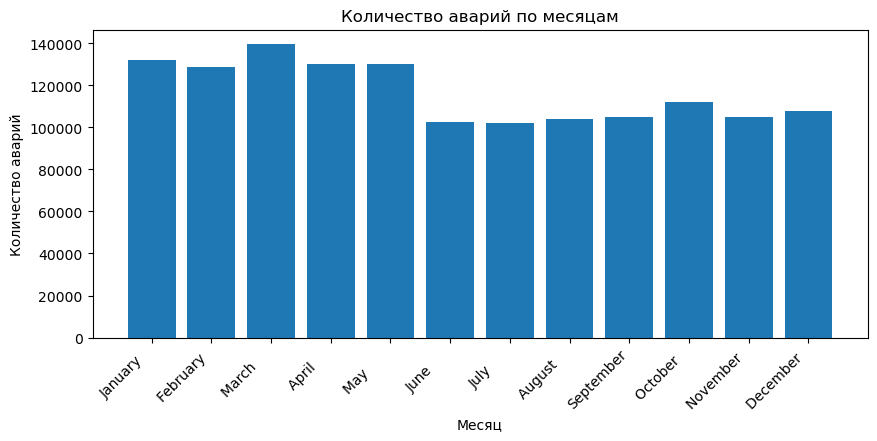

In [51]:
# визуолизация результатов
plt.figure(figsize=(10, 4))
plt.bar(df['month'], df['collision_count'])
plt.xlabel('Месяц')
plt.ylabel('Количество аварий')
plt.title('Количество аварий по месяцам')
plt.xticks(rotation=45, ha='right')
plt.show()

- Видно, что количество аварий имеет явные сезонные колебания в течение года.
- Наибольшее количество аварий обычно происходит в марте и октябре, что может быть связано с изменениями погоды и дорожных условий в эти месяцы.
- Наименьшее количество аварий зафиксировано в июне и июле, возможно, из-за летнего сезона и лучших дорожных условий.
- Аварийное количество кажется стабильным в период с августа по декабрь.

## Создайте модель для оценки водительского риска

## Проведите анализ важности факторов ДТП

## Выводы

In [ ]:
# Закрываем курсор и соединение
#cursor.close()
#connection.close()